In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model

# We specify the input shape so that weights are initialised

model = Sequential([
    Flatten(input_shape= (28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Print the model summary

# Lets see the weights:

# model.weights (raw visualization of the weights)
# But instead we can see a nice summary:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 # We can also substitute the last the softmax activation function of the last dense layer
 # by a new Softmax layer.
 
 # And change the names of the layers

 model = Sequential([
    Flatten(input_shape= (28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu', name='layer_2'),
    Dense(10, name='layer_3'),  # Linear activation
    Softmax(name='layer_4')     # Then softmax to all.
])
 
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 layer_3 (Dense)             (None, 10)                170       
                                                                 
 layer_4 (Softmax)           (None, 10)                0         
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size=3,
           activation='relu',
           strides=1,
           padding='SAME',
           input_shape=(1,28,28),
           data_format='channels_first'), # data_format='channels_last' is the defualt one
    MaxPooling2D(pool_size=3,
                 strides=1,
                 data_format='channels_first'),
    Flatten(),
    Dense(10, activation='softmax')
])

In [ ]:
# Print the model summary

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 28, 28)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 26, 26)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                108170    
                                                                 
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # data labels are integers
                                            # if vectors: categorical_crossentropy
    metrics=['accuracy', 'mae']
)

In [ ]:
# Or we can be more succint and do it more carefully:
# Example
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy', # data labels are integers
                                            # if vectors: categorical_crossentropy
    metrics=[acc, mae]
)

In [ ]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)
# Even the learning rate
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [44]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
# Lets make sure we have the right model for classifying the
# Fashion-MNIST datasets

# Making model
model = Sequential ([
    Conv2D(24, kernel_size=3,
           activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling it
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.005),
    loss = 'sparse_categorical_crossentropy',
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 24)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4056)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                40570     
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 40,920
Trainable params: 40,920
Non-trainable params: 0
__________________________________________________

#### Load the data

In [48]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [49]:
# Print the shape of the training data

# Check if it contains 60k images of 28x28:
print(train_images.shape)

# Lets see the labels:
print('Example label: ', train_labels[0])
print('Unique labels: ', np.unique(train_labels))

(60000, 28, 28)
Example label:  9
Unique labels:  [0 1 2 3 4 5 6 7 8 9]


In [50]:
# Define the labels, from 0 to 9 according to the following:
# (That is why the 10 unit softmax output :O )

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [51]:
# Rescale the image values so that they lie in between 0 and 1
# to be able to visualize

print('First label is: ', train_labels[0])
print('Which corresponds to: ', labels[train_labels[0]])

train_images = train_images/255.
test_images = test_images/255.

First label is:  9
Which corresponds to:  Ankle boot


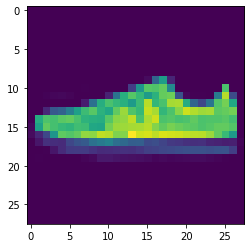

label: Sneaker


In [52]:
# Display one of the images

i = 30399
# the i-th images, all horiz. pixel and all vertical pixel
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}') 

#### Fit the model

In [38]:
# Fit the model

model.fit(train_images, train_labels,
          epochs=2, batch_size=256)

Epoch 1/2
235/235 [==============================] - 14s 57ms/step - loss: 0.5729 - sparse_categorical_accuracy: 0.7961 - mean_absolute_error: 4.4200
Epoch 2/2
235/235 [==============================] - 12s 52ms/step - loss: 0.3814 - sparse_categorical_accuracy: 0.8663 - mean_absolute_error: 4.4200


In [53]:
# We can do better by training it for 8 epochs and saving the object

history = model.fit(train_images, train_labels,
                    epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 17s 70ms/step - loss: 0.6120 - sparse_categorical_accuracy: 0.7758 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 16s 70ms/step - loss: 0.3633 - sparse_categorical_accuracy: 0.8706 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 16s 69ms/step - loss: 0.3119 - sparse_categorical_accuracy: 0.8882 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 16s 69ms/step - loss: 0.2811 - sparse_categorical_accuracy: 0.9001 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 18s 75ms/step - loss: 0.2626 - sparse_categorical_accuracy: 0.9057 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 16s 68ms/step - loss: 0.2500 - sparse_categorical_accuracy: 0.9091 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 16s 68ms/step - loss: 0.2339 - sparse_categoric

#### Plot training history

In [54]:
# Load the history (which is a dict) into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.612001,0.775767,4.420001
1,0.363258,0.870650,4.420001
2,0.311897,0.888200,4.420000
3,0.281103,0.900133,4.419999
4,0.262585,0.905700,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

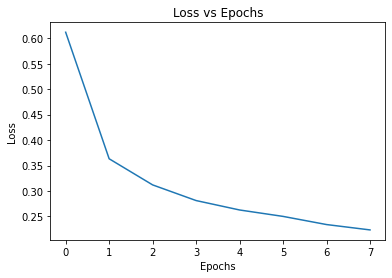

In [55]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='Loss vs Epochs',
                    legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

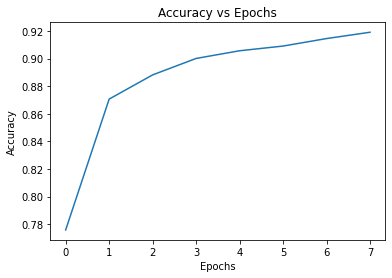

In [56]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy',
                   title='Accuracy vs Epochs',
                   legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

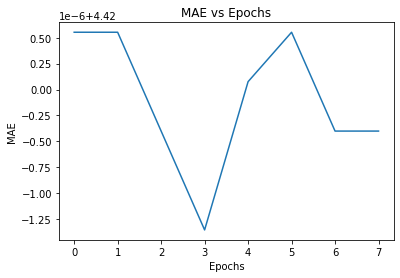

In [57]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error',
                   title='MAE vs Epochs',
                   legend=False)
mae_plot.set(xlabel='Epochs', ylabel='MAE')

Notice how the MAE stays constant.

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

